In [29]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
# File to Load
file_to_load = "Resources/avocado.csv"

# Read Avocado File and store into Pandas data frame
avocado_data = pd.read_csv(file_to_load)

# Output File (CSV)
output_data_file = "output_data/cleaned_avo.csv"

# Preview of the DataFrame
avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [30]:
#Removed unecessary unamed column
del avocado_data['Unnamed: 0']
avocado_data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [31]:
#Rename columns and replace PLUs with product name
avocado_data=avocado_data.rename(
                            columns = {"4046":"Hass Small",
                                     "4225":"Hass Large",
                                     "4770":"Hass XLarge",
                                     'AveragePrice':'Average Price',
                                     'type':'Type',
                                     'year':'Year',
                                     'region':'Region'
                                    
                                    })
# Add total sales volume
avocado_data['Total Sales'] =''
Total = avocado_data['Average Price'] * avocado_data['Total Volume']
avocado_data['Total Sales']= Total
avocado_data['Total Sales']= avocado_data['Total Sales'].map("${:.2f}".format)

# Display cleaned data frame
avocado_data.head()

,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,$85434.70
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,$74083.92
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,$109944.80
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,$85311.52
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,$65330.69


In [32]:
# Change sales from object to float
avocado_data['Total Sales']=avocado_data['Total Sales'].str.replace('$',' ',regex=True).astype(float)

In [33]:
#Ensure data types are expected - looks good.
avocado_data.dtypes

Date              object
Average Price    float64
Total Volume     float64
Hass Small       float64
Hass Large       float64
Hass XLarge      float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
Type              object
Year               int64
Region            object
Total Sales      float64
dtype: object

In [34]:
# Identify incomplete rows - shows none
avocado_data.count()

Date             18249
Average Price    18249
Total Volume     18249
Hass Small       18249
Hass Large       18249
Hass XLarge      18249
Total Bags       18249
Small Bags       18249
Large Bags       18249
XLarge Bags      18249
Type             18249
Year             18249
Region           18249
Total Sales      18249
dtype: int64

In [35]:
# See what type are avocados there are
avocado_data["Type"].value_counts()

conventional    9126
organic         9123
Name: Type, dtype: int64

In [36]:
# See what years are represented in the data
# 2018 has partial data as it was was downloaded from the Hass Avocado Board website in May of 2018
avocado_data["Year"].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

In [37]:
# Show regions in the dataset 
# - WestTexNewMexico has 335 rows while the rest show 338.
# - There is a total US column, will remove to not double count
avocado_data["Region"].value_counts()

SouthCentral           338
StLouis                338
Detroit                338
Boise                  338
Pittsburgh             338
Philadelphia           338
BuffaloRochester       338
Houston                338
Midsouth               338
LasVegas               338
MiamiFtLauderdale      338
Louisville             338
Boston                 338
Sacramento             338
California             338
Atlanta                338
SanDiego               338
Spokane                338
PhoenixTucson          338
SouthCarolina          338
GreatLakes             338
Jacksonville           338
Columbus               338
Syracuse               338
Chicago                338
Plains                 338
LosAngeles             338
Tampa                  338
NorthernNewEngland     338
Roanoke                338
Albany                 338
HartfordSpringfield    338
DallasFtWorth          338
BaltimoreWashington    338
Portland               338
West                   338
Southeast              338
H

In [38]:
#Delete TotalUS row to limit duplication in data
delete_row = avocado_data[avocado_data["Region"]=='TotalUS'].index
clean_avocado_data = avocado_data.drop(delete_row)
clean_avocado_data.head()

,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.70
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.92
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.80
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.52
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.69


In [39]:
# Export clean data to CSV for analysis
clean_avocado_data.to_csv(output_data_file)

In [40]:
# Display a statistical overview for a high level insight into the data
avocado_data.describe()

,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Total Sales
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,1.824900e+04
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,9.279484e+05
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.686048e+06
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.344500e+02
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,1.716418e+04
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,1.395298e+05
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,5.141914e+05
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,5.437991e+07


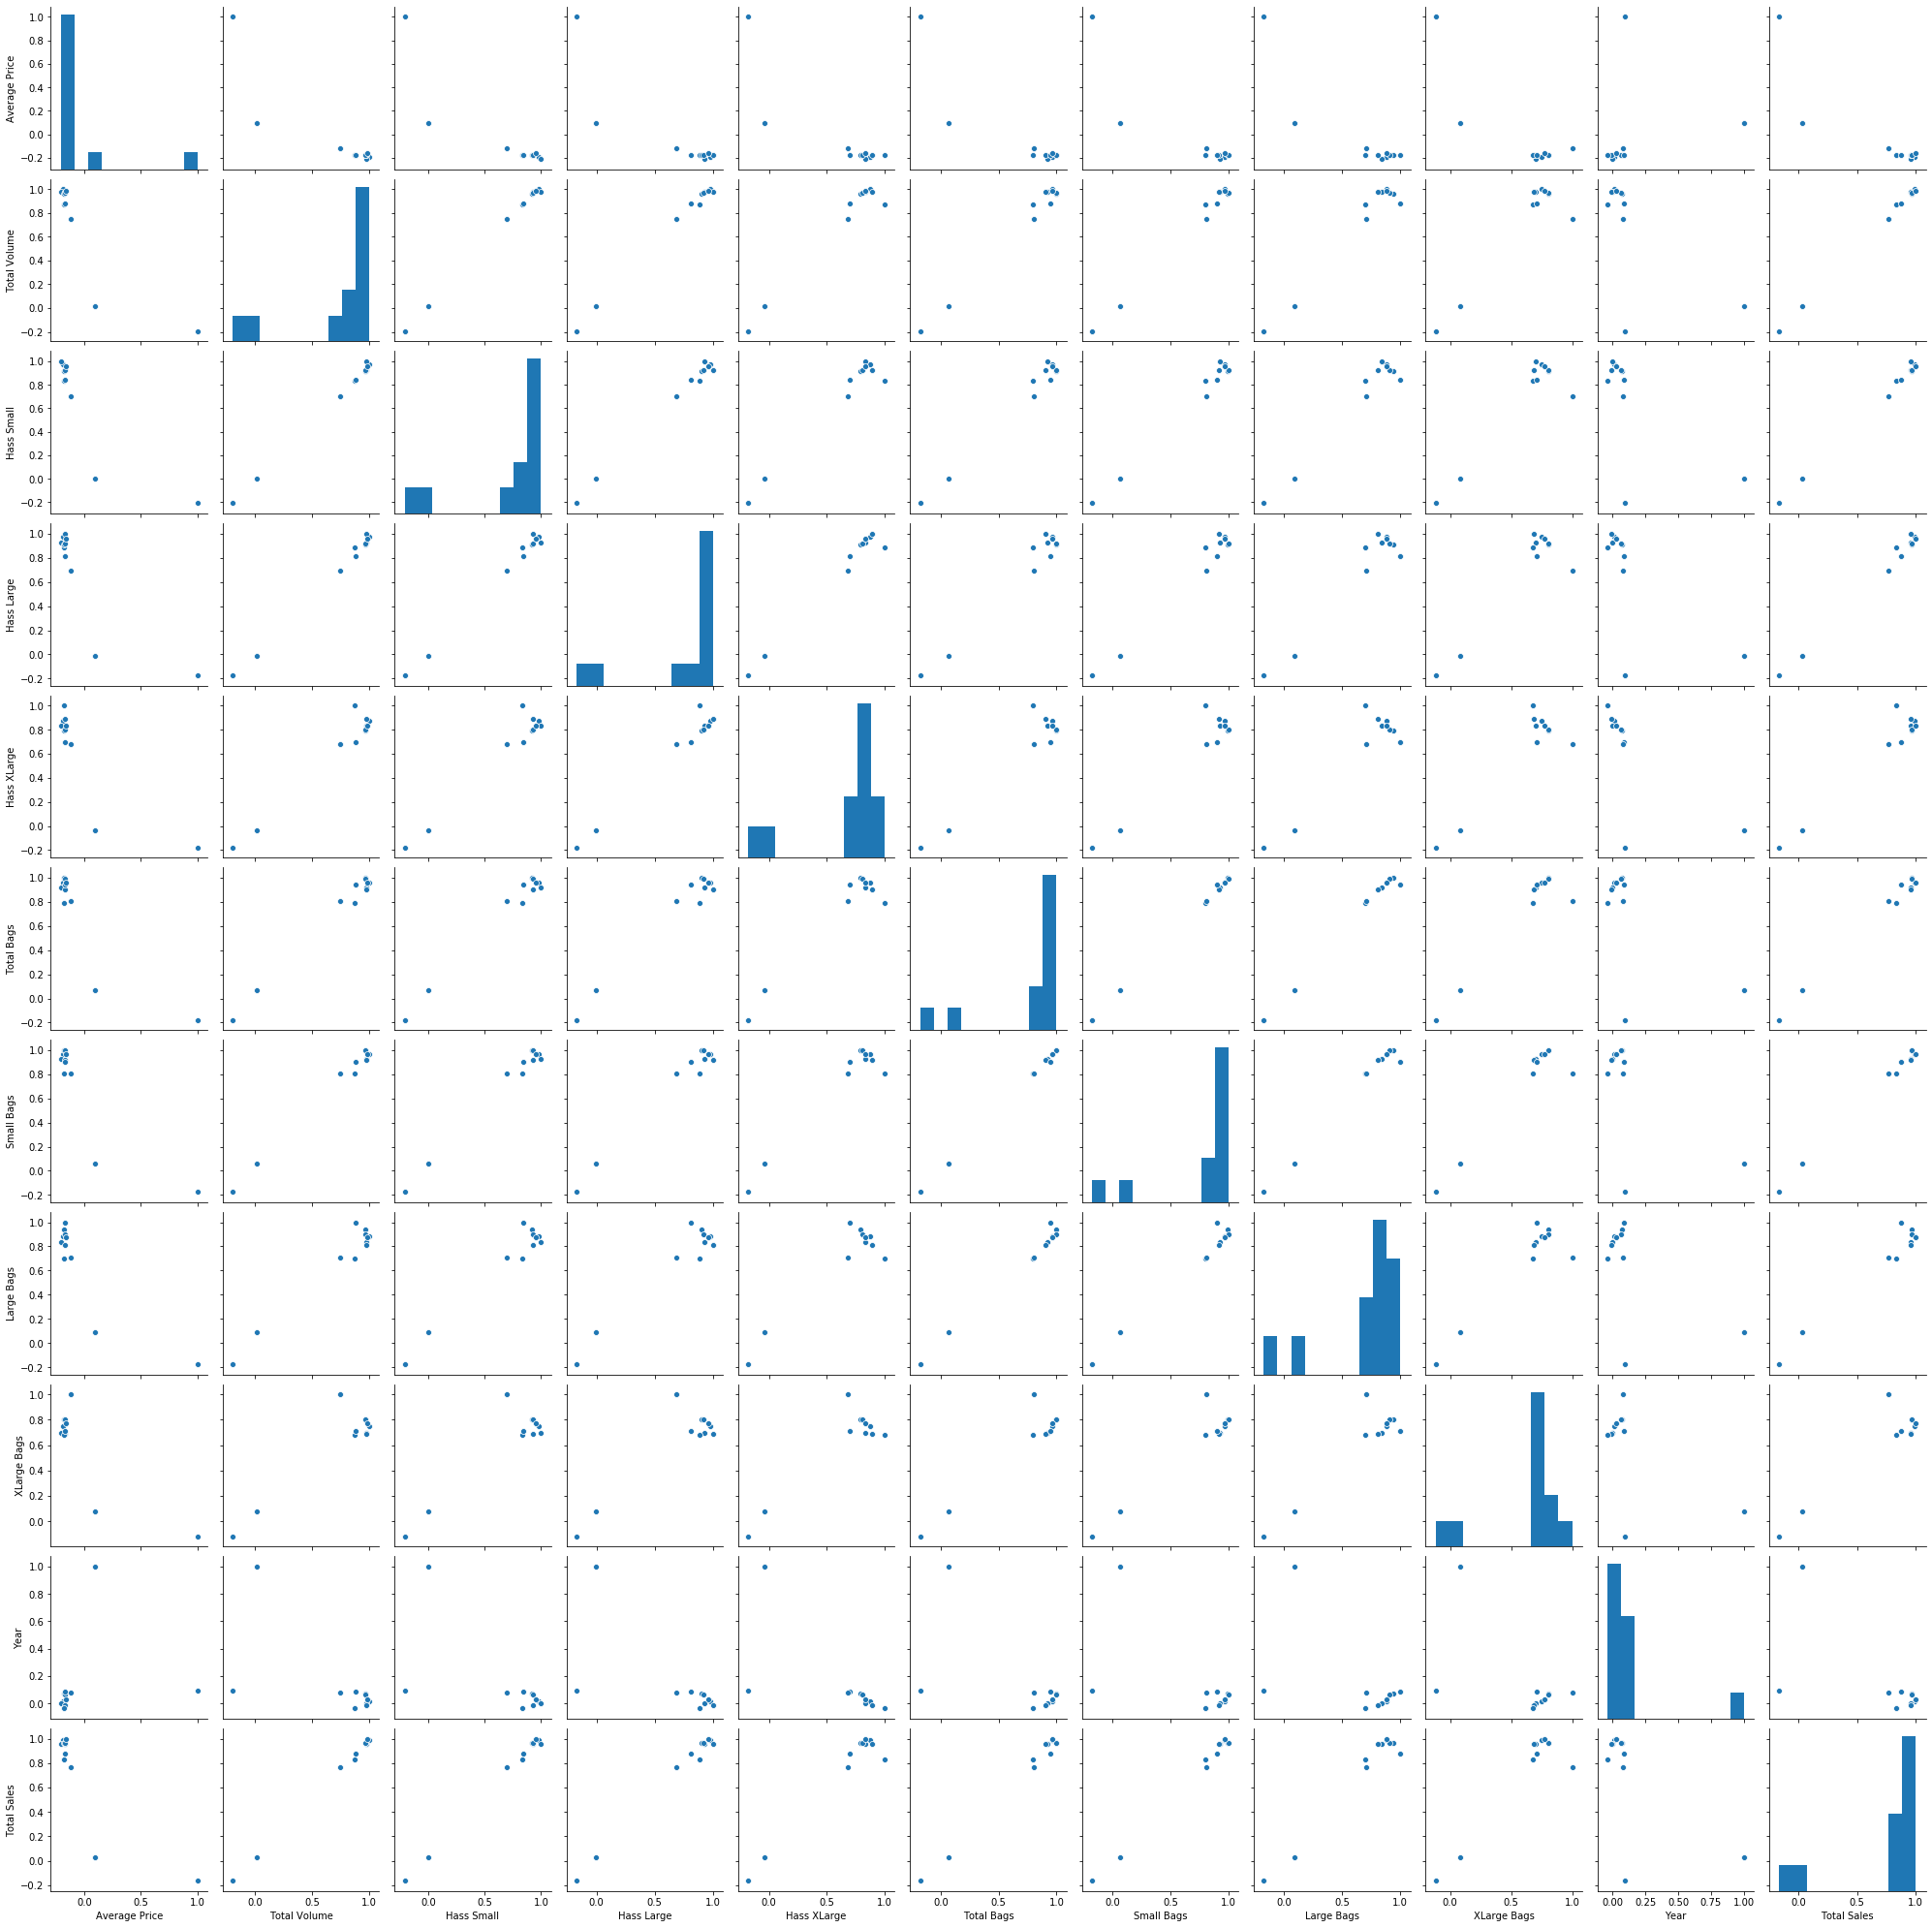

In [41]:
sns.pairplot(avocado_data.corr())

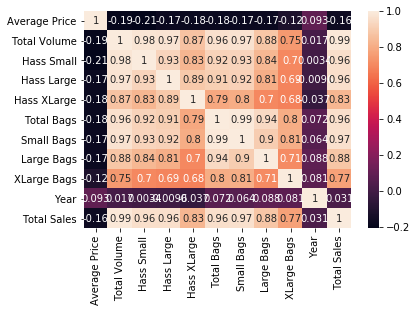

In [42]:
sns.heatmap(avocado_data.corr(), annot=True)